<a href="https://colab.research.google.com/github/geonextgis/Mastering-Machine-Learning-and-GEE-for-Earth-Science/blob/main/04_Machine_Learning_Algorithms/11_Perceptron_Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron Trick**

A perceptron is one of the simplest and fundamental building blocks in deep learning and artificial neural networks. It was developed by Frank Rosenblatt in the late 1950s and is a type of artificial neuron or node that can be used for binary classification tasks. While perceptrons are limited in their capabilities compared to more complex neural network architectures, they serve as a foundational concept for understanding how neural networks work.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*gGmqkjA0VJCe5EhJnoQDNg.png" width="50%"></center>

Here's an introduction to perceptrons in deep learning:

1. **Basic Structure**: A perceptron takes multiple binary inputs (0 or 1) and produces a single binary output (0 or 1). Each input is associated with a weight, and there is also an additional parameter called the bias. Mathematically, the output of a perceptron is calculated as the weighted sum of inputs plus the bias, followed by applying a step function (often the Heaviside step function or a similar activation function) to the sum.

$$y = \text{Activation Function}\left(\sum_{i=1}^{n} \text{weight}_i \cdot \text{input}_i + \text{bias}\right)$$

2. **Weights and Bias**: The weights in a perceptron represent the strength of the connection between the inputs and the output. A larger weight means that the corresponding input has a stronger influence on the output. The bias acts as an offset, allowing the perceptron to produce different outputs even when all inputs are zero.

3. **Activation Function**: The activation function determines whether the perceptron should fire (output 1) or not (output 0) based on the weighted sum of inputs plus the bias. The choice of activation function is crucial, as it introduces non-linearity into the model. Common activation functions include the step function, sigmoid, ReLU (Rectified Linear Unit), and others.

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

## **Make a Data**

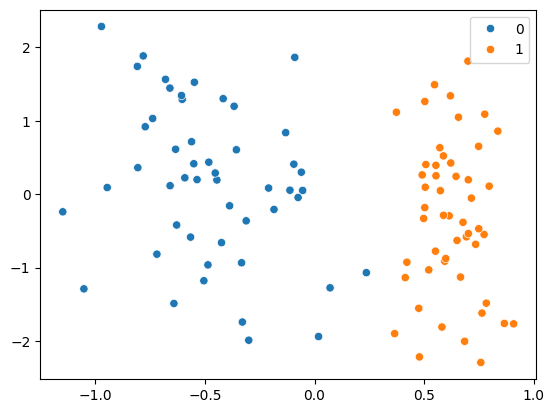

In [2]:
# Make a sample classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=0, hypercube=False, class_sep=1.5)

# Plot the data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

## **Build the Perceptron Algorithm**

In [4]:
# Write a function to build the algorithm of a step function
def step(z):
    """
    This function returns 0 if value is less than or equals to 0 and returns 1
    if value is greater than 0.
    """
    return 0 if z <= 0 else 1

In [5]:
# Write a function to build the algorithm of a perceptron
def perceptron(X, y, epochs):

    # Add an extra column for intercept term
    X = np.insert(X, 0, 1, axis=1)

    # Initialize the weights
    weights = np.ones(X.shape[1])

    # Initialize a learning rate
    lr = 0.01

    for i in range(epochs):
        # Select a random index
        n = np.random.randint(len(X))
        # Calculate the y-predicted
        y_hat = step(np.dot(X[n], weights))
        # Update the weights
        weights = weights + lr * (y[n]-y_hat) * X[n]

    return weights[0], weights[1:]

In [6]:
# Calculate the intercept and coefficients
intercept_, coef_ = perceptron(X, y, epochs=1000)

print("Intercept(w0):", intercept_)
print("Coefficients(w1, w2):", coef_)

Intercept(w0): -0.05000000000000076
Coefficients(w1, w2): [1.31635653 0.2000689 ]


General Equation of a Line is:<br>
$$ \ Ax + By + C = 0 \ $$

We an also write it like:<br>
$$ \ y = mx + c \ $$ where $ \ m\ $ is the slope and $ \ c\ $ is the y-intercept.<br>
or,
$$ \ y = -\frac{A}{B}x - \frac{C}{B} \ $$
where $ -\frac{A}{B} \ $ is the slope and $ -\frac{C}{B} \ $ is the intercept.<br>

In [7]:
m = -(coef_[0]/coef_[1])
c = -(intercept_/coef_[1])
print("Slope(m):", m)
print("Y-Intercept(c):", c)

Slope(m): -6.579516147316327
Y-Intercept(c): 0.24991391031076496


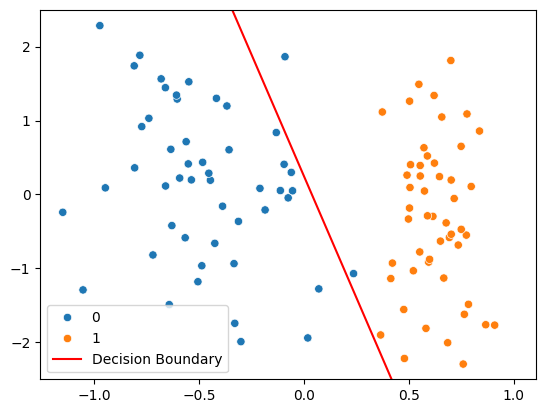

In [8]:
# Plot the decision boundary
X_line = np.linspace(-1, 1, 50)
y_line = X_line * m + c

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
sns.lineplot(x=X_line, y=y_line, c="red", label="Decision Boundary")
plt.ylim((-2.5, 2.5))
plt.show()

## **Apply the Logistic Regression**

In [9]:
# Instantiate a Logistic Regression model
lr = LogisticRegression()

# Fit the data
lr.fit(X, y)

LogisticRegression()

In [10]:
# Print intercept and coefficients
print("Intercept of LR Model (w0):", lr.intercept_)
print("Coefficients of LR Model (w1, w2):", lr.coef_)

Intercept of LR Model (w0): [-0.57436567]
Coefficients of LR Model (w1, w2): [[ 4.31078475 -0.06563266]]


In [11]:
# Calculate the slope(m) and y-intercept(c) of the LR model
m_lr = -(lr.coef_[0][0] / lr.coef_[0][1])
c_lr = -(lr.intercept_[0] / lr.coef_[0][1])

print("Slope(m) of LR:", m_lr)
print("Y-Intercept(c) of LR:", c_lr)

Slope(m) of LR: 65.68048111404401
Y-Intercept(c) of LR: -8.751217225838875


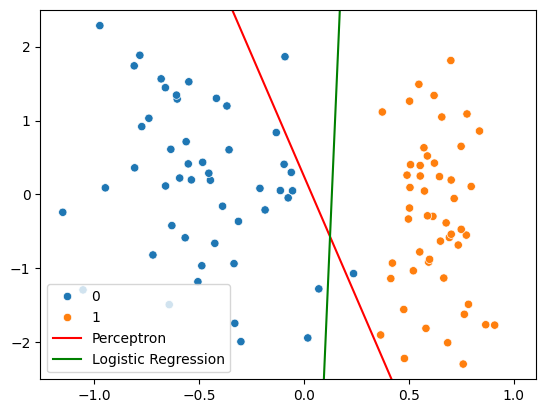

In [12]:
# Plot the decision boundary
X_line = np.linspace(-1, 1, 50)
y_line_lr = X_line * m_lr + c_lr

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
sns.lineplot(x=X_line, y=y_line, c="red", label="Perceptron")
sns.lineplot(x=X_line, y=y_line_lr, c="green", label="Logistic Regression")
plt.ylim((-2.5, 2.5))
plt.show()